In [97]:
import pandas as pd

In [98]:
df = pd.read_csv('sport_data.csv')

In [99]:
df.head()

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball


In [100]:
df.shape

(18, 4)

In [101]:
df.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000


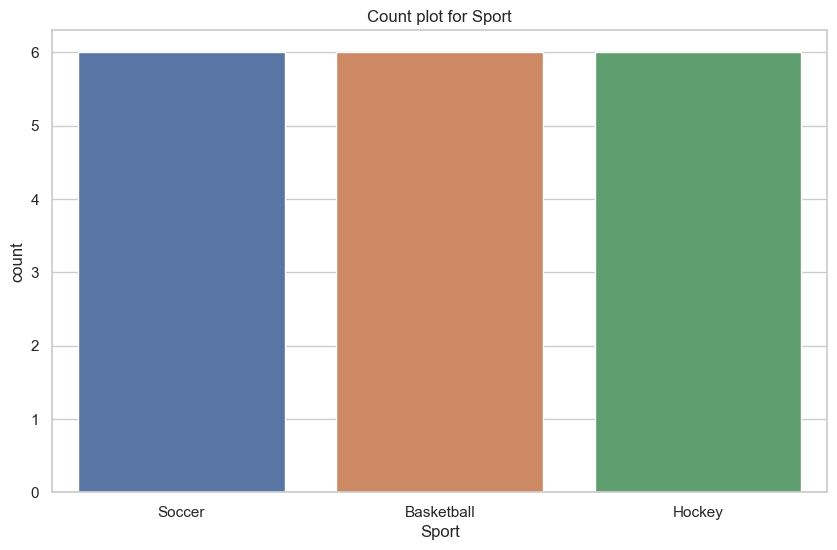

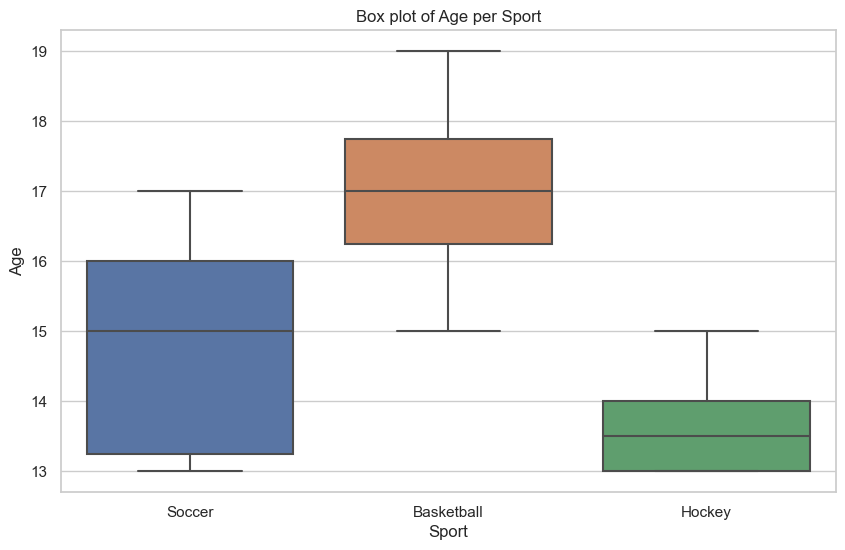

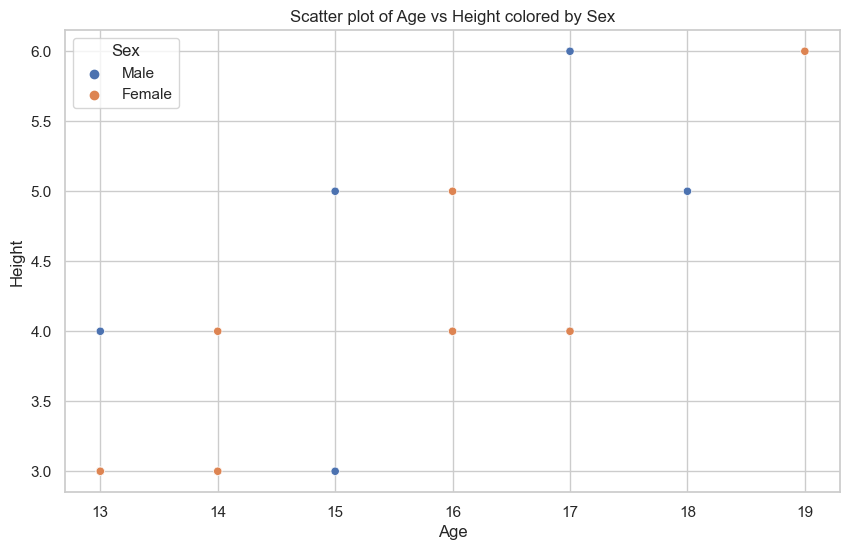

In [102]:
# plot multiple garps using this data  
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall aesthetics.
sns.set(style="whitegrid")

# Create a bar plot showing the count for each Sport
plt.figure(figsize=(10, 6))
sns.countplot(x='Sport', data=df)
plt.title('Count plot for Sport')
plt.show()

# Create a box plot to visualize the distribution of Age per Sport
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sport', y='Age', data=df)
plt.title('Box plot of Age per Sport')
plt.show()

# Create a scatter plot of Age vs Height, colored by Sex
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Height', hue='Sex', data=df)
plt.title('Scatter plot of Age vs Height colored by Sex')
plt.show()

In [103]:
df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})

In [104]:
df.head()

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball


In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [106]:
x = df.drop(['Sport'], axis=1)

In [107]:
x.head()

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1


In [108]:
y = df.drop(['Age' , "Height" , "Sex"] , axis=1)

In [109]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [110]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (12, 3) (12, 1)
Testing set: (6, 3) (6, 1)


In [111]:
clf = DecisionTreeClassifier()

clf.fit(X_train , y_train)

DecisionTreeClassifier()

In [112]:
test = clf.predict(X_test)

In [113]:
y_test

,Sport
15,Hockey
9,Soccer
8,Hockey
5,Basketball
17,Hockey
10,Soccer


In [114]:
test

array(['Hockey', 'Hockey', 'Hockey', 'Basketball', 'Hockey', 'Hockey'],
      dtype=object)

In [115]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report


In [116]:
accuracy = accuracy_score(y_test , test)

In [117]:
accuracy

0.6666666666666666

In [118]:
new = clf.predict([[15,4,1]])

/Users/hrushikeshnayak/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [119]:
new

array(['Hockey'], dtype=object)

In [121]:
import joblib
joblib.dump(clf, 'ml_sport_model.joblib')

['ml_sport_model.joblib']

In [123]:
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/hrushikeshnayak/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)

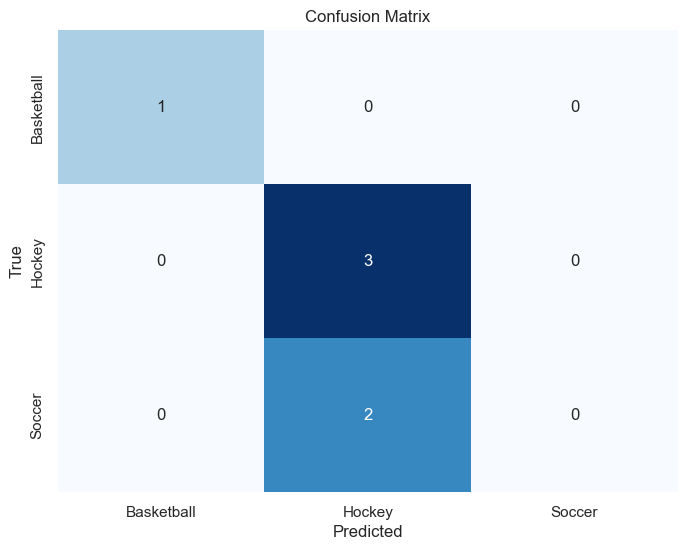

In [126]:
cm = confusion_matrix(y_test, test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [127]:
model  = joblib.load('ml_sport_model.joblib')

In [128]:
model.predict([[15,4,1]])

/Users/hrushikeshnayak/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Hockey'], dtype=object)